In [1]:
from dynasim.app import DynaSim
#from dynasim import spatial
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pdb
import time
%pdb

Automatic pdb calling has been turned ON


In [2]:
groupvar = 'gwno'
timevar = 'year'
start = 2012
end = 2100
nsim = 5

#w = spatial.cshapes_cross_section(start, rowstandardize=True)

#formulas = ['conflict ~ L1c + log(gdpcap) + log(population)']
#modtypes = ['mlogit']


formulas = ["conflict ~ (L1c>0) + log(L1gdpcap) + log(population)",
           "gdpcap ~ MA10gdpcap*cw0conflict"]
modtypes = ['mlogit', 'identity']


#tsvars = [{'name': 'L1c', 'var': 'conflict', 'lag': 1}]
tsvars = [{'name': 'L1c', 'var': 'conflict', 'lag': 1},
          {'name': 'MA10gdpcap', 'var': 'gdpcap', 'ma': 10},
          {'name': 'L1gdpcap', 'var': 'gdpcap', 'lag': 1},
          {'name': 'cw0conflict', 'var': 'conflict', 'cw': '==0'}
         ]

#spatialdicts = [{'name': 'sQL1c', 'var': 'L1c', 'w':w}]
spatialdicts = []


filename = 'C:/tmp/test.hdf5'
#filename = ''
df = pd.read_csv('C:/Users/Jonas/Dropbox/Collaborations/DynaSim/conflictdata.csv', sep='\t')

In [3]:
df

,gwno,year,gdpcap,population,education,conflict,conflict0,timeindep
0,2,1946,12266.953685,141940.000000,NaN,0.0,1.0,165
1,2,1947,11839.878608,144688.000000,NaN,0.0,1.0,166
2,2,1948,12085.393589,147203.000000,NaN,0.0,1.0,167
3,2,1949,11919.262765,149770.000000,NaN,0.0,1.0,168
4,2,1950,12769.224333,157813.040000,0.892298,0.0,1.0,169
5,2,1951,13534.373185,159927.223000,0.895655,0.0,1.0,170
6,2,1952,13809.512774,162362.839000,0.898919,0.0,1.0,171
7,2,1953,14219.931807,165051.157000,0.902092,0.0,1.0,172
8,2,1954,13869.676817,167929.118000,0.905176,0.0,1.0,173
9,2,1955,14612.983306,170939.332000,0.908173,0.0,1.0,174


In [4]:
simobj = DynaSim(formulas, 
        modtypes,
        tsvars,
        spatialdicts,
        df, 
        groupvar, 
        timevar,     
        nsim, 
        start, 
        end,
        filename)

In [5]:
simobj.filename

'C:/tmp/test.hdf5'

In [6]:
simobj.calculate_model_ts()
#simobj.calculate_model_spatial_vars()
simobj.estimate()
simobj.calculate_betas()
simobj.setup_simulation_data()


for model in simobj.models:
    print(model.summary())

#simobj.simdf


C:\Users\Jonas\Anaconda3\envs\python27\lib\site-packages\pandas\core\groupby.py:685: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  return func(g, *args, **kwargs)
C:\Users\Jonas\Anaconda3\envs\python27\lib\site-packages\statsmodels\discrete\discrete_model.py:130: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  endog_dummies = get_dummies(endog.icol(0))
C:\Users\Jonas\Anaconda3\envs\python27\lib\site-packages\statsmodels\discrete\discrete_model.py:580: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
C:\Users\Jonas\Anaconda3\envs\python27\lib\site-packages\statsmodels\discrete\discrete_model.py:1756: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1,

         Current function value: 0.269321
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                          MNLogit Regression Results                          
Dep. Variable:               conflict   No. Observations:                 8889
Model:                        MNLogit   Df Residuals:                     8881
Method:                           MLE   Df Model:                            6
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                  0.4779
Time:                        16:15:25   Log-Likelihood:                -2394.0
converged:                      False   LL-Null:                       -4585.7
                                        LLR p-value:                     0.000
     conflict=1       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.8932      0.482     -1.854      0.064       

In [7]:
t1 = time.time()
simobj.sim()
print(time.time()-t1)

10.5490000248


In [8]:
def get_percentiles(q, results, summaryvars, df, timevar, start):
    nvars = results.shape[2]
    nobs = results.shape[1]
    percentiles = np.empty((nobs, nvars))
    for i in range(nvars):
        percentiles[:, i] = np.percentile(results[:,:,i], q=q, axis=0)
    colnames = [var+'_p'+str(q) for var in summaryvars]
    df2 = df.loc[df.index.get_level_values(timevar)>=start]
    percentiles = pd.DataFrame(percentiles, 
                               columns=colnames, 
                               index=df2.index)
    return(percentiles)


def get_summary(results, summaryvars, df, timevar, start):
    p50 = get_percentiles(50, results, summaryvars, df, timevar, start)
    p25 = get_percentiles(25, results, summaryvars, df, timevar, start)
    p75 = get_percentiles(75, results, summaryvars, df, timevar, start)
    df2 = df.loc[df.index.get_level_values(timevar)>=start]
    df2 = df2.join(p50, how="inner")
    df2 = df2.join(p25, how="inner")
    df2 = df2.join(p75, how="inner")
    return(df2)

def count_outcomes(results, summaryvars, df, timevar, start):
    df2 = df.loc[df.index.get_level_values(timevar)>=start]
    nvars = results.shape[2]
    nobs = results.shape[1]
    K = 3
    counts = np.zeros((nobs, K))
    colnames = ['K'+str(k) for k in range(K)]
    for obs in range(nobs):
        res = np.unique(results[:,obs,summaryvars.index('conflict')], return_counts=True)
        countlist = zip(res[0].astype(np.int64), res[1])
        for count in countlist:
            counts[obs, count[0]] = count[1]
    counts = pd.DataFrame(counts, columns = colnames, index=df2.index)
    return(counts)




In [9]:
if simobj.filename != '':
    f = h5py.File(simobj.filename, 'r')
    results = f['simulation_results']
else:
    results = simobj.results
    
resultdf = get_summary(results, simobj.summaryvars, simobj.simdf, simobj.timevar, simobj.start)
#nobs = len(set(df2.index.get_level_values(groupvar)))
counts = count_outcomes(results, simobj.summaryvars, simobj.simdf, simobj.timevar, simobj.start)
resultdf = resultdf.join(counts, how="inner")

if simobj.filename != '':
    f.close()

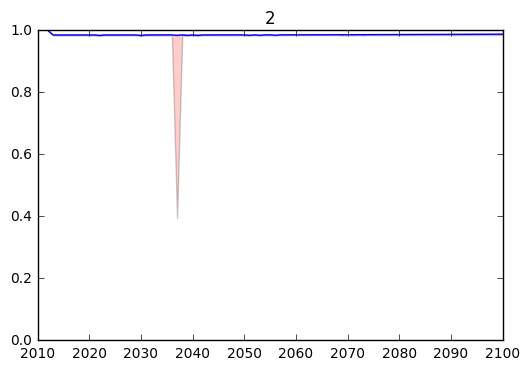

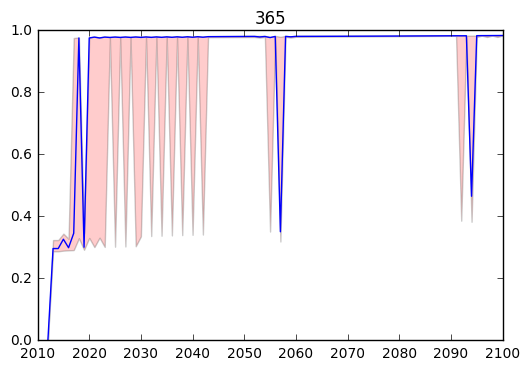

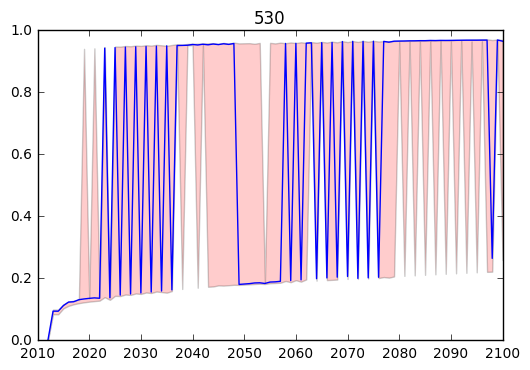

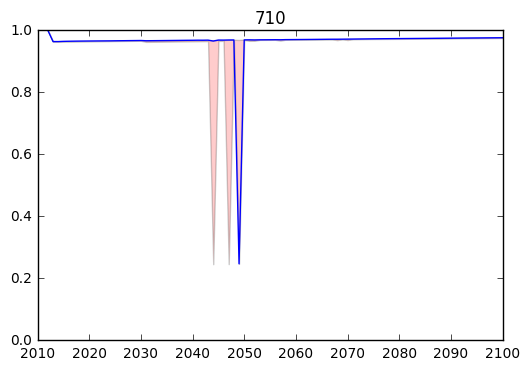

In [10]:
%matplotlib inline
resultdf = resultdf.reset_index()
for i, group in resultdf.groupby(simobj.groupvar):
    if i in [2,365, 530,710]:
        name = "sim"+str(i)+".png"
        plt.figure()
        plt.title(str(i))
        plt.ylim(0,1)
        plt.plot(group[simobj.timevar], group['p_conflict0_p50'])
        plt.fill_between(group[simobj.timevar], group['p_conflict0_p25'], group['p_conflict0_p75'], alpha=0.2, facecolor="red")
        #plt.savefig(name) 
        plt.show()

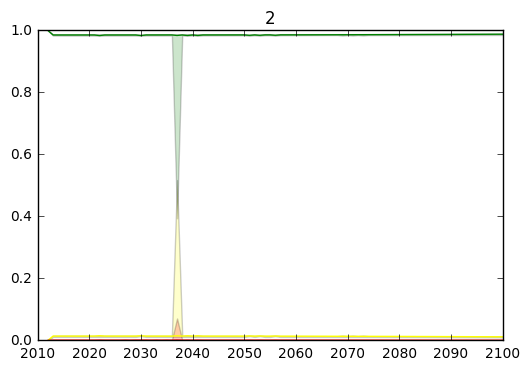

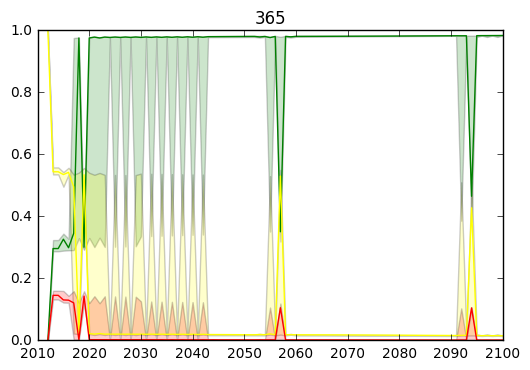

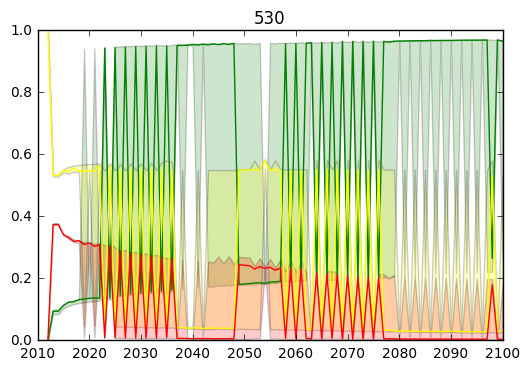

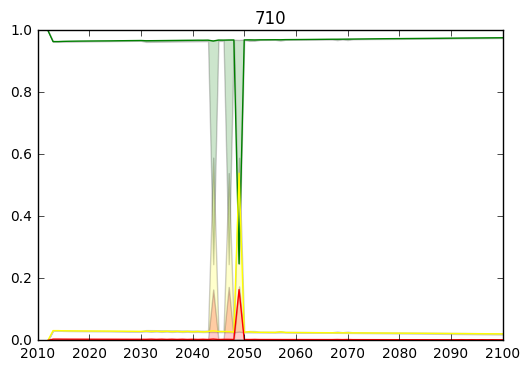

In [11]:
for i, group in resultdf.groupby(simobj.groupvar):
    if i in [2,365, 530,710]:
        name = "sim"+str(i)+".png"
        plt.figure()
        plt.title(str(i))
        plt.ylim(0,1)
        plt.plot(group[simobj.timevar], group['p_conflict0_p50'], color="green")
        plt.plot(group[simobj.timevar], group['p_conflict1_p50'], color="yellow")
        plt.plot(group[simobj.timevar], group['p_conflict2_p50'], color="red")
        
        plt.fill_between(group[simobj.timevar], group['p_conflict0_p25'], group['p_conflict0_p75'], alpha=0.2, facecolor="green")
        plt.fill_between(group[simobj.timevar], group['p_conflict1_p25'], group['p_conflict1_p75'], alpha=0.2, facecolor="yellow")
        plt.fill_between(group[simobj.timevar], group['p_conflict2_p25'], group['p_conflict2_p75'], alpha=0.2, facecolor="red")
        #plt.savefig(name) 
        plt.show()

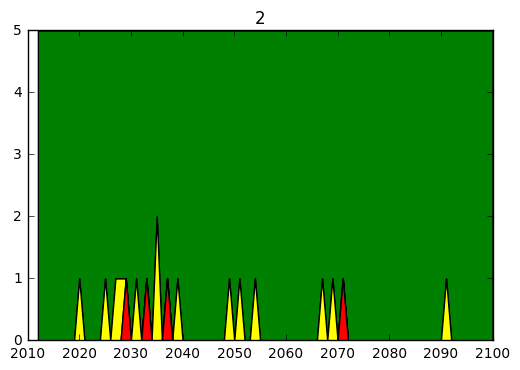

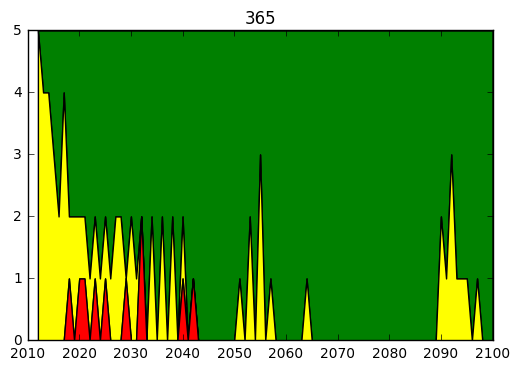

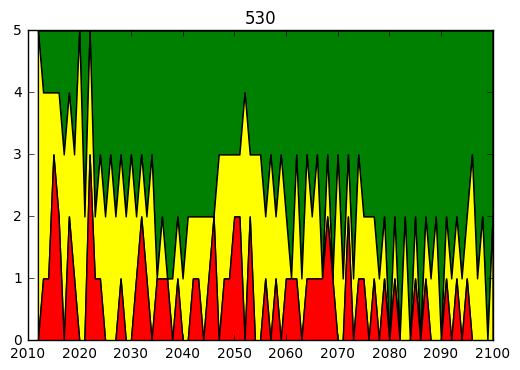

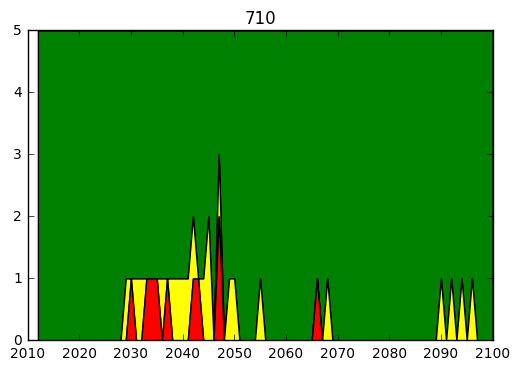

In [12]:
for i, group in resultdf.groupby(simobj.groupvar):
    if i in [2,365, 530,710]:
        name = "sim"+str(i)+".png"
        plt.figure()
        plt.title(str(i))
        plt.ylim(0,nsim)
        plt.fill_between(group[simobj.timevar], group['K1'] + group['K2'], nsim, facecolor="green")
        plt.fill_between(group[simobj.timevar], group['K2'], group['K1'] + group['K2'], facecolor="yellow")
        plt.fill_between(group[simobj.timevar], 0, group['K2'], facecolor="red")
        #plt.savefig(name) 
        plt.show()

In [13]:
for i, group in resultdf.groupby(simobj.groupvar):
    if i in [2,365, 530,710]:
        print(group[['gwno', 'year', 'K0', 'K1', 'K2']])

       gwno  year   K0   K1   K2
0         2  2012  5.0  0.0  0.0
173       2  2013  5.0  0.0  0.0
346       2  2014  5.0  0.0  0.0
519       2  2015  5.0  0.0  0.0
692       2  2016  5.0  0.0  0.0
865       2  2017  5.0  0.0  0.0
1038      2  2018  5.0  0.0  0.0
1211      2  2019  5.0  0.0  0.0
1384      2  2020  4.0  1.0  0.0
1557      2  2021  5.0  0.0  0.0
1730      2  2022  5.0  0.0  0.0
1903      2  2023  5.0  0.0  0.0
2076      2  2024  5.0  0.0  0.0
2249      2  2025  4.0  1.0  0.0
2422      2  2026  5.0  0.0  0.0
2595      2  2027  4.0  1.0  0.0
2768      2  2028  4.0  1.0  0.0
2941      2  2029  4.0  0.0  1.0
3114      2  2030  5.0  0.0  0.0
3287      2  2031  4.0  1.0  0.0
3460      2  2032  5.0  0.0  0.0
3633      2  2033  4.0  0.0  1.0
3806      2  2034  5.0  0.0  0.0
3979      2  2035  3.0  2.0  0.0
4152      2  2036  5.0  0.0  0.0
4325      2  2037  4.0  0.0  1.0
4498      2  2038  5.0  0.0  0.0
4671      2  2039  4.0  1.0  0.0
4844      2  2040  5.0  0.0  0.0
5017      

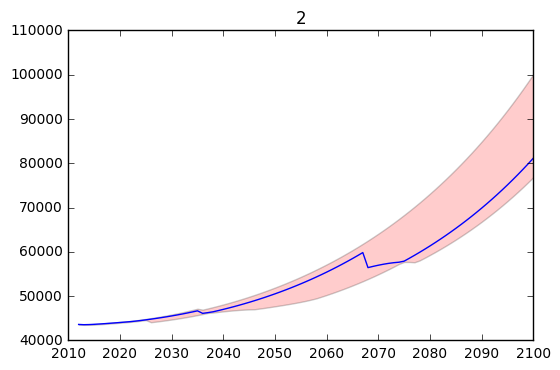

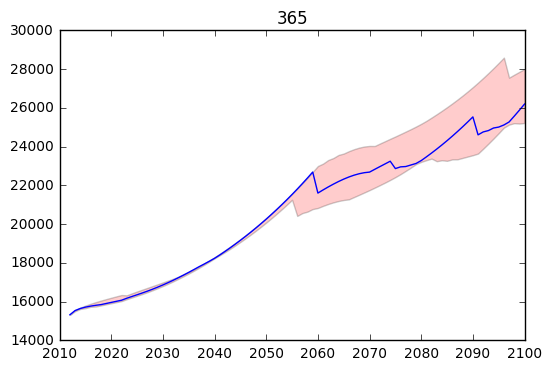

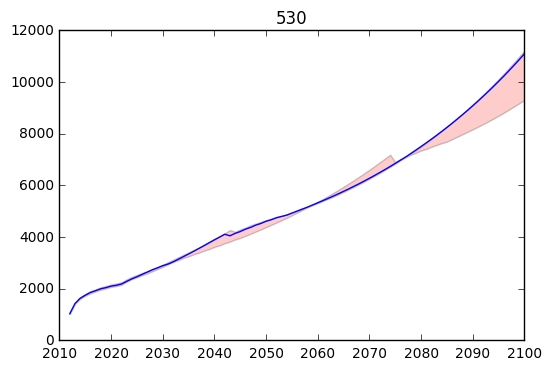

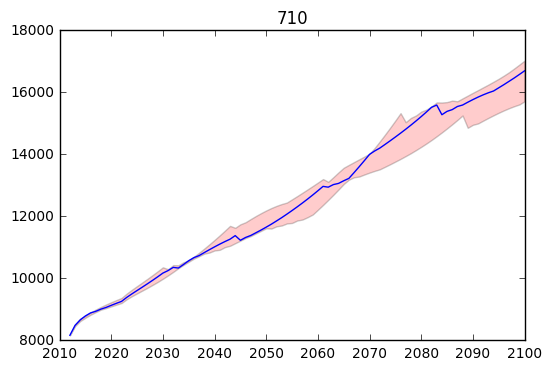

In [13]:
for i, group in resultdf.groupby(simobj.groupvar):
    if i in [2,365, 530,710]:
        name = "sim"+str(i)+".png"
        plt.figure()
        plt.title(str(i))
        plt.plot(group[simobj.timevar], group['gdpcap_p50'])
        plt.fill_between(group[simobj.timevar], group['gdpcap_p25'], group['gdpcap_p75'], alpha=0.2, facecolor="red")
        #plt.savefig(name) 
        plt.show()

In [15]:
simobj.summaryvars

['conflict', 'gdpcap', 'p_conflict0', 'p_conflict1', 'p_conflict2']